<a href="https://colab.research.google.com/github/jetsonmom/fastcampus_yolo/blob/main/7_predict_image_using_trained_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

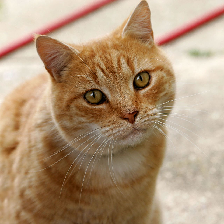

In [2]:
# 라이브러리 준비
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image  import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

# load the model 사이즈를 맞춰줘야함
model = VGG16()

image = load_img('sample_data/cat0.jpg', target_size=(224, 224))
image


In [3]:
# convert the image pixels to a numpy array  이미지를 어레이로 바꾸고 prediction하게 입력 shape를 맞춰준
image = img_to_array(image)

# reshape data for the model 샘플 수 즉 차원을 넣어주고
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the VGG model 이미지를 VGG에서 사용할 수 있게 PROCESSING 하고
image = preprocess_input(image)

In [4]:
# predict the probability across all output classes
yhat = model.predict(image)

# convert the probabilities to class labels 라벨을 DECODE
label = decode_predictions(yhat)

# retrieve the most likely result, e.g. highest probability
print(label)
label = label[0][0]

# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))  # 결과 확인하니 prediction한 고양이는 타이거 고양이일 확율이 높네요

35363/35363 [==============================] - 0s 0us/step
[[('n02123159', 'tiger_cat', 0.40713057), ('n02124075', 'Egyptian_cat', 0.34898826), ('n02123045', 'tabby', 0.14276437), ('n02127052', 'lynx', 0.017933317), ('n07930864', 'cup', 0.009918803)]]
tiger_cat (40.71%)
